In [47]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Load the dataset
sst = xr.open_dataset("/home/ecme3497/hpcperm/ece4-database/amip-forcing/tosbcs_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-3_gn_187001-201706.nc")

In [49]:
# Subset the data to 2007-2017
sst_sel = sst.sel(time=slice("2007-01-01", "2017-12-31"))

In [50]:
# Compute the monthly climatology (mean of all Januaries, Februaries, etc.)
monthly_clim = sst_sel.groupby("time.month").mean(dim="time")

In [51]:
# Replace the 'month' coordinate with a proper datetime time coordinate 
# Let's create artificial dates (e.g., year 2000) for a single idealized year
new_time = pd.date_range("2000-01-01", periods=12, freq="MS") # Monthly start dates

In [52]:
# Assign this new time coordinate
monthly_clim = monthly_clim.drop_vars('time', errors='ignore')
monthly_clim = monthly_clim.assign_coords(month=new_time).swap_dims({'month': 'month'}).rename({'month': 'time'}) # This renames the variable month to make it a true time series

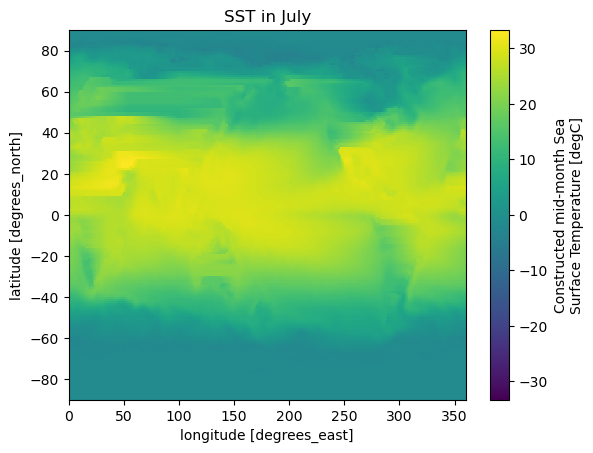

In [53]:
monthly_clim['tosbcs'].sel(time='2000-07-01').plot(cmap='viridis')
plt.title('SST in July')
plt.show()

In [54]:
print(monthly_clim)

<xarray.Dataset> Size: 3MB
Dimensions:   (time: 12, lat: 180, bnds: 2, lon: 360)
Coordinates:
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time      (time) datetime64[ns] 96B 2000-01-01 2000-02-01 ... 2000-12-01
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (time, lat, bnds) float64 35kB -90.0 -89.0 -89.0 ... 89.0 90.0
    lon_bnds  (time, lon, bnds) float64 69kB 0.0 1.0 1.0 ... 359.0 359.0 360.0
    tosbcs    (time, lat, lon) float32 3MB -1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8
Attributes: (12/33)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             input4MIPs
    comment:                 Based on Hurrell SST/sea ice consistency criteri...
    contact:                 PCMDI (pcmdi-cmip@llnl.gov)
    creation_date:           2017-10-31T16:48:17Z
    data_specs_version:      01.00.16
    ...                      ...
    target_mip:    

In [55]:
sst_zonalmean = monthly_clim['tosbcs'].mean(dim='lon')

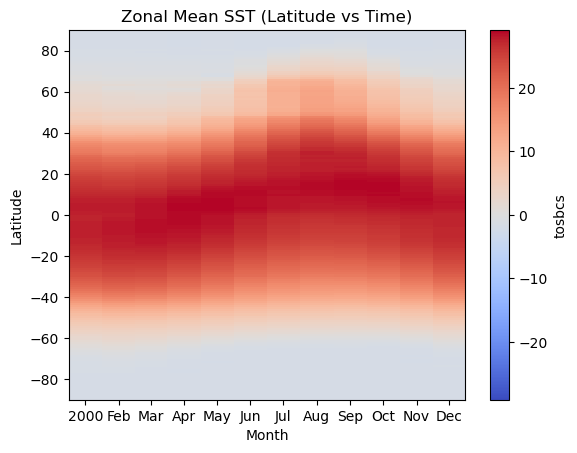

In [56]:
sst_zonalmean.plot(x='time', y='lat', cmap='coolwarm')
plt.title('Zonal Mean SST (Latitude vs Time)')
plt.xlabel('Month')
plt.ylabel('Latitude')
plt.show()

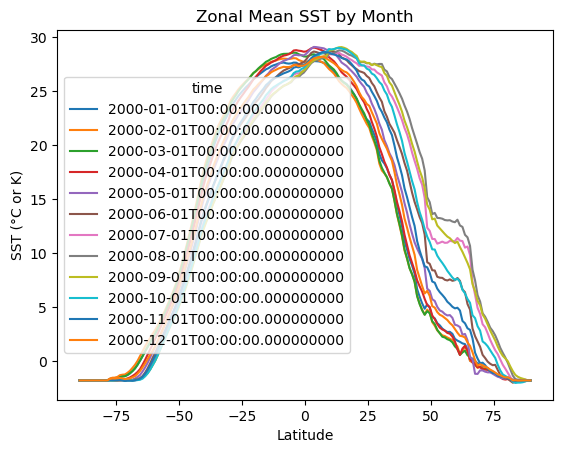

In [57]:
sst_zonalmean.plot.line(x='lat', hue='time')
plt.title('Zonal Mean SST by Month')
plt.xlabel('Latitude')
plt.ylabel('SST (°C or K)')  # Adjust unit if you know it
plt.show()

In [58]:
# Expand to match the shape of original data
sst_expanded = sst_zonalmean.broadcast_like(monthly_clim['tosbcs'])

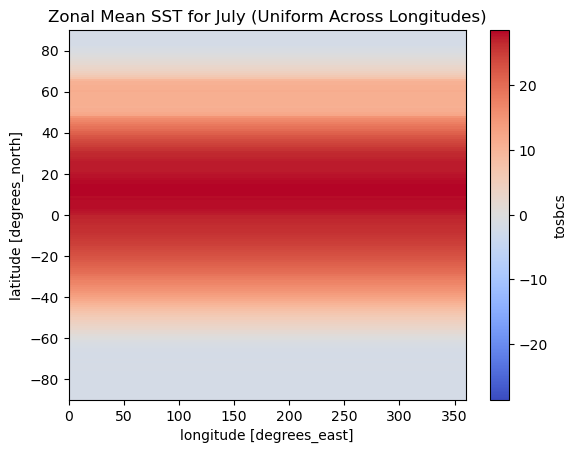

In [59]:
sst_expanded.sel(time='2000-07-01').plot(cmap='coolwarm')
plt.title('Zonal Mean SST for July (Uniform Across Longitudes)')
plt.show()

In [75]:
# Load the dataset
sst = xr.open_dataset("/home/ecme3497/hpcperm/ece4-database/amip-forcing/tosbcs_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-3_gn_187001-201706.nc")

# Calculatin monthly mean
# Subset the data to 2007-2017
sst_sel = sst.sel(time=slice("2007-01-01", "2017-12-31"))
# Compute the monthly climatology (mean of all Januaries, Februaries, etc.)
monthly_clim = sst_sel.groupby("time.month").mean(dim="time")
# Replace the 'month' coordinate with a proper datetime time coordinate 
# Let's create artificial dates (e.g., year 2000) for a single idealized year
new_time = pd.date_range("2000-01-01", periods=12, freq="MS") # Monthly start dates
# Assign this new time coordinate
monthly_clim = monthly_clim.drop_vars('time', errors='ignore')
monthly_clim = monthly_clim.assign_coords(month=new_time).swap_dims({'month': 'month'}).rename({'month': 'time'}) # This renames the variable month to make it a true time series

# Calculate the zonal mean (sst values for each latitude at a constant longitude)
sst_zonalmean = monthly_clim['tosbcs'].mean(dim='lon')

# Expand to match the shape of original data
sst_expanded = sst_zonalmean.broadcast_like(monthly_clim['tosbcs'])

# Expand to the complete timeframe dataset
# Get month index (1-12) for each time step
month_index = sst['time'].dt.month - 1 # 0-based indexing for .isel
# Select corresponding month from sst_expanded for each time step
sst_clim_expanded = sst_expanded.isel(time=month_index.values)
#Assing the original time back
sstfield = sst_clim_expanded.assign_coords(time=sst['time'])

sstfield_ds = xr.Dataset(
    data_vars={
        'tosbcs': sstfield
    },
    coords={
        'time': sstfield['time'],
        'lat': sstfield['lat'],
        'lon': sstfield['lon']
    }
)

sstfield_ds['tosbcs'].attrs = sst['tosbcs'].attrs


In [40]:
print(sst)

<xarray.Dataset> Size: 459MB
Dimensions:    (time: 1770, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) datetime64[ns] 14kB 1870-01-16T12:00:00 ... 2017-06-16
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 28kB ...
    lat_bnds   (lat, bnds) float64 3kB -90.0 -89.0 -89.0 ... 89.0 89.0 90.0
    lon_bnds   (lon, bnds) float64 6kB 0.0 1.0 1.0 2.0 ... 359.0 359.0 360.0
    tosbcs     (time, lat, lon) float32 459MB ...
Attributes: (12/33)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             input4MIPs
    comment:                 Based on Hurrell SST/sea ice consistency criteri...
    contact:                 PCMDI (pcmdi-cmip@llnl.gov)
    creation_date:           2017-10-31T16:48:17Z
    data_specs_version:      01.00.16
    ...                

In [71]:
print(sstfield_ds)

<xarray.Dataset> Size: 459MB
Dimensions:  (lat: 180, lon: 360, time: 1770)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 14kB 1870-01-16T12:00:00 ... 2017-06-16
Data variables:
    tosbcs   (time, lat, lon) float32 459MB -1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8


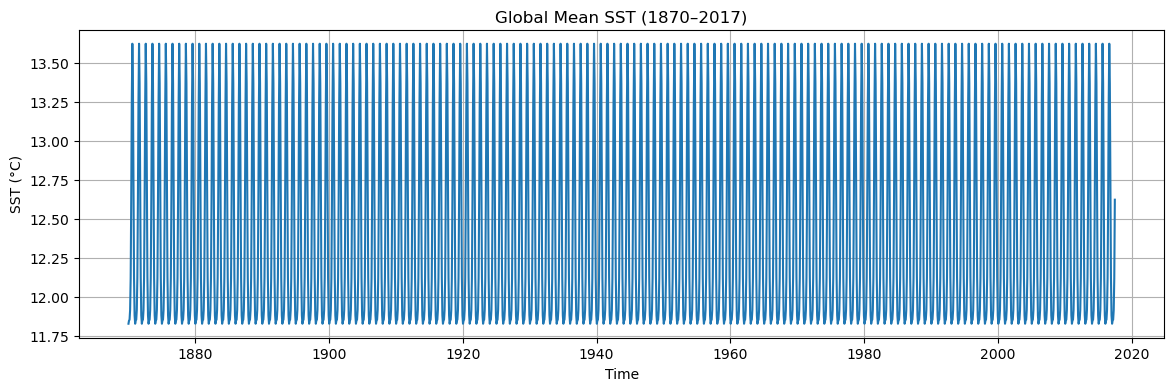

In [72]:
# Compute global mean SST over lat and lon
sst_global_mean = sstfield.mean(dim=["lat", "lon"])

# Plot the time series
plt.figure(figsize=(14, 4))
sst_global_mean.plot()
plt.title("Global Mean SST (1870–2017)")
plt.ylabel("SST (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.show()

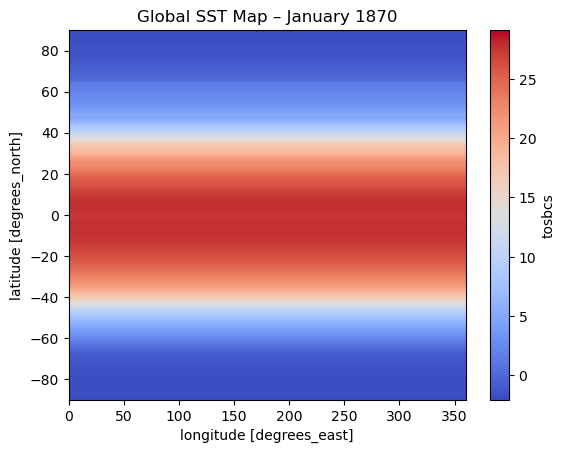

In [73]:
# Global SST map for January 1870
sstfield.isel(time=0).plot(
    cmap="coolwarm", 
    vmin=sstfield.min(), 
    vmax=sstfield.max()
)
plt.title("Global SST Map – January 1870")
plt.show()

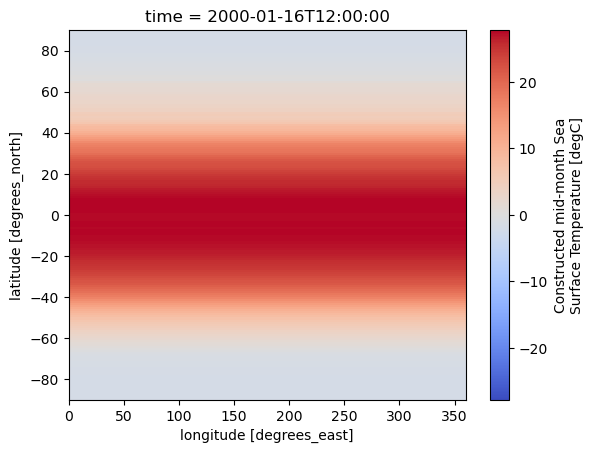

In [78]:
sstfield_ds['tosbcs'].sel(time='2000-01-16').plot(cmap="coolwarm")

# SIC

In [92]:
threshold = -1.5 # SST threshold in degrees Celsius for sea ice precense

# SIC = 1 where SST < freezing threshold
sic = xr.where(sstfield_ds ['tosbcs'] < threshold, 1.0, 0.0)

# Create new dataset
# Convert to a Dataset for consistency
sic_dataset = xr.Dataset({'siconcbcs': sic})

# Assign same attributes if needed (optional)
sic_dataset['siconcbcs'].attrs = {
    'long_name': 'Sea Ice Concentration (derived from SST)',
    'units': '1',
    'standard_name': 'sea_ice_area_fraction'
}


In [86]:
print (sic_dataset)

<xarray.Dataset> Size: 918MB
Dimensions:    (lat: 180, lon: 360, time: 1770)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 14kB 1870-01-16T12:00:00 ... 2017-06-16
Data variables:
    siconcbcs  (time, lat, lon) float64 918MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0


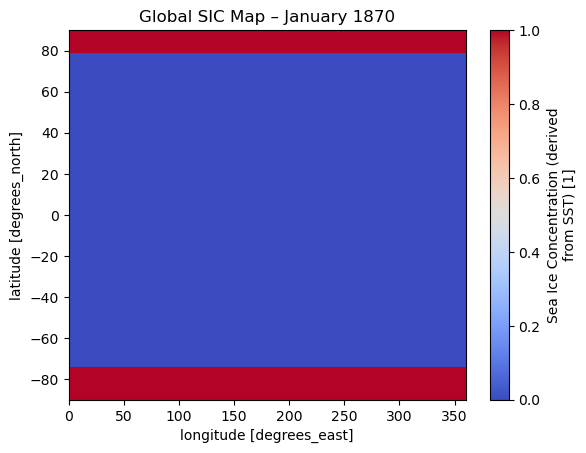

In [93]:
# Global SIC map for January 1870
sic_dataset['siconcbcs'].isel(time=0).plot(
    cmap="coolwarm", 
    vmin=sic_dataset['siconcbcs'].min(), 
    vmax=sic_dataset['siconcbcs'].max()
)
plt.title("Global SIC Map – January 1870")
plt.show()

In [83]:
print(sic)

<xarray.Dataset> Size: 459MB
Dimensions:    (time: 1770, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) datetime64[ns] 14kB 1870-01-16T12:00:00 ... 2017-06-16
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 28kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    siconcbcs  (time, lat, lon) float32 459MB ...
Attributes: (12/33)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             input4MIPs
    comment:                 Based on Hurrell SST/sea ice consistency criteri...
    contact:                 PCMDI (pcmdi-cmip@llnl.gov)
    creation_date:           2017-10-31T16:47:00Z
    data_specs_version:      01.00.16
    ...                      ...
    target_mip:              CMIP
    title:             